<a href="https://colab.research.google.com/github/gyunini/Pytorch_Practice/blob/main/%081_Pytorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch basics

## numpy to tensor

In [ ]:
import numpy as np

n_array = np.arange(10).reshape(2,5)
print(n_array)
print("ndim: ", n_array.ndim, "shape: ", n_array.shape)

[[0 1 2 3 4]
 [5 6 7 8 9]]
ndim:  2 shape:  (2, 5)


In [ ]:
import torch
t_array = torch.FloatTensor(n_array) # 넘파이 어레이를 텐서로 변환
print(t_array)
print("ndim: ", t_array.ndim, "shape: ", t_array.shape)

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])
ndim:  2 shape:  torch.Size([2, 5])


In [ ]:
print(t_array.shape)
print(t_array.ndim)
print(t_array.size())

torch.Size([2, 5])
2
torch.Size([2, 5])


### Array to tensor

- .tensor
- .FloatTensor
- .from_numpy

이렇게 세 가지 이용가능 근데 실제로는 이렇게 텐서를 직접 생성할 일은 별로 없음 주로 weight값들을 다루기 때문에 이렇게 생성해서 쓸 일은 별로 없음

### Data to Tensor

In [ ]:
data = [[3, 5], [10, 5]]
x_data = torch.tensor(data)
x_data

tensor([[ 3,  5],
        [10,  5]])

### ndArray ro Tensor

In [ ]:
nd_array_ex = np.array(data)
tensor_array = torch.from_numpy(nd_array_ex)
tensor_array

tensor([[ 3,  5],
        [10,  5]])

### numpy like operations

In [ ]:
data = [[3, 5, 20], [10, 5, 50], [1, 5, 10]]
x_data = torch.tensor(data)

In [ ]:
x_data[1:]

tensor([[10,  5, 50],
        [ 1,  5, 10]])

In [ ]:
x_data[:2, 1:]

tensor([[ 5, 20],
        [ 5, 50]])

In [ ]:
x_data.flatten()

tensor([ 3,  5, 20, 10,  5, 50,  1,  5, 10])

In [ ]:
torch.ones_like(x_data)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [ ]:
x_data.numpy()

array([[ 3,  5, 20],
       [10,  5, 50],
       [ 1,  5, 10]])

In [ ]:
x_data.shape

torch.Size([3, 3])

In [ ]:
x_data.dtype

torch.int64

In [ ]:
x_data.device # cpu가 나옴

device(type='cpu')

- colab은 도커로 구성되어있는 가상 컴퓨터 -> 런타임을 바꾸면 꺼졌다가 켜져서 모든 리소스가 날아감 -> 다시 한번 더 실행해야함

In [ ]:
if torch.cuda.is_available():
  x_data_cuda = x_data.to('cuda') # 런타임 유형 GPU로 바꿀 것
x_data_cuda.device # cuda로 나옴

device(type='cuda', index=0)

### Tensor handling

In [ ]:
tensor_ex = torch.rand(size=(2,3,2)) # 3차원 텐서 생성
tensor_ex

tensor([[[0.8599, 0.7181],
         [0.2348, 0.9270],
         [0.5134, 0.3712]],

        [[0.3223, 0.9621],
         [0.4952, 0.7450],
         [0.8105, 0.7567]]])

In [ ]:
tensor_ex.view([-1, 6]) # 안에 배열 크기를 집어넣는다..

tensor([[0.8599, 0.7181, 0.2348, 0.9270, 0.5134, 0.3712],
        [0.3223, 0.9621, 0.4952, 0.7450, 0.8105, 0.7567]])

In [ ]:
tensor_ex.reshape([-1, 6])  # view나 reshape이나 똑같은 결과

tensor([[0.8599, 0.7181, 0.2348, 0.9270, 0.5134, 0.3712],
        [0.3223, 0.9621, 0.4952, 0.7450, 0.8105, 0.7567]])

- 그럼 언제 view랑 reshape이 달라지냐??

https://inmoonlight.github.io/2021/03/03/PyTorch-view-transpose-reshape/

In [ ]:
a = torch.zeros(3, 2)
b = a.view(2, 3)
a.fill_(1)              # torch.Tensor.fill_()

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
b # b도 1로 차있음 -> copy를 한게 아니라 메모리 주소는 똑같고 표현하는 형태만 바꿔준것

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
a = torch.zeros(3, 2)
b = a.t().reshape(6) # transpose
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
b # reshape을 쓰면 달라짐 메모리는 쭉 옆으로 나열된 것인데 view는 이걸 보장해주지만 reshape은 보장 안해줌. 깨지는 순간 copy를 해버림

tensor([0., 0., 0., 0., 0., 0.])

- squeeze, unsqueeze

In [ ]:
tensor_ex = torch.rand(size=(2,1,2))
tensor_ex.squeeze() # 2,2 로 만듬

tensor([[0.7811, 0.5725],
        [0.5780, 0.5379]])

In [ ]:
tensor_ex = torch.rand(size=(2,2))
tensor_ex.unsqueeze(0).shape # dim(axis)0에 1을 집어넣음 # # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.

torch.Size([1, 2, 2])

In [ ]:
tensor_ex.unsqueeze(1).shape

torch.Size([2, 1, 2])

In [ ]:
tensor_ex.unsqueeze(2).shape

torch.Size([2, 2, 1])

### Tensor operations

In [ ]:
n1 = np.arange(10).reshape(2, 5)
n2 = np.arange(10).reshape(5, 2)
t1 = torch.FloatTensor(n1)
t2 = torch.FloatTensor(n2)

t1 + t1

tensor([[ 0.,  2.,  4.,  6.,  8.],
        [10., 12., 14., 16., 18.]])

In [ ]:
t1 - t1

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
t1 + 10

tensor([[10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]])

In [ ]:
t1 + t2 # shape이 맞지 않아서 오류

RuntimeError: ignored

In [ ]:
n2 = np.arange(10).reshape(5,2)
t2 = torch.FloatTensor(n2)

t1.mm(t2) # dot을 쓰지 않고 matrix multiplication을 쓴다!!

tensor([[ 60.,  70.],
        [160., 195.]])

In [ ]:
t1.dot(t2) # 오류

RuntimeError: ignored

In [ ]:
t1.matmul(t2) # 그치만 mm을 쓰자..

tensor([[ 60.,  70.],
        [160., 195.]])

- dot은 스칼라(벡터)일때는 문제가 없다

In [ ]:
a = torch.rand(10)
b = torch.rand(10)
a.dot(b)

tensor(1.9059)

In [ ]:
a

tensor([0.7201, 0.1727, 0.5837, 0.0605, 0.0471, 0.5405, 0.4960, 0.7080, 0.3067,
        0.4853])

In [ ]:
a = torch.rand(10)
b = torch.rand(10)
a.mm(b) # mm은 벡터 연산이 안된다... RuntimeError: self must be a matrix

RuntimeError: ignored

- 즉 벡터 연산과 matrix연산을 구분 했다 - dot, mm

In [ ]:
t1.mm(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

- mm, matmul broadcasting

In [ ]:
a = torch.rand(5,2,3)
b = torch.rand(3)
a.mm(b) # 오류

RuntimeError: ignored

In [ ]:
a = torch.rand(5,2,3)
b = torch.rand(3)
a.mm(b) # 오류

RuntimeError: ignored

In [ ]:
a = torch.rand(5,2,3)
b = torch.rand(3)
a.matmul(b) # broadcasting

tensor([[0.6862, 0.7895],
        [0.5642, 0.4614],
        [0.5392, 1.0496],
        [0.9498, 1.0669],
        [0.2400, 0.1652]])

- 위에 연산을 뜯어보면

In [ ]:
print(a[0].mm(torch.unsqueeze(b,1)))
print(a[1].mm(torch.unsqueeze(b,1)))
print(a[2].mm(torch.unsqueeze(b,1)))
print(a[3].mm(torch.unsqueeze(b,1)))
print(a[4].mm(torch.unsqueeze(b,1))) # 위에랑 같은 결과

a[4].mm(torch.unsqueeze(b,1)).squeeze() # 위에랑 똑같이 하려면..

tensor([[0.6862],
        [0.7895]])
tensor([[0.5642],
        [0.4614]])
tensor([[0.5392],
        [1.0496]])
tensor([[0.9498],
        [1.0669]])
tensor([[0.2400],
        [0.1652]])


tensor([0.2400, 0.1652])

# tensor operations for ML/DL formula

- 필요할 때는 찾아봐라!

In [ ]:
import torch
import torch.nn.functional as F

tensor = torch.FloatTensor([0.5, 0.7, 0.1])
# torch.nn.functional.softmax(input, dim=None, _stacklevel=3, dtype=None)
h_tensor = F.softmax(tensor, dim=0)
h_tensor

tensor([0.3458, 0.4224, 0.2318])

In [ ]:
y = torch.randint(5, (10,5)) # 0~4 내에서 10행5열로 만들어라
y

tensor([[0, 4, 1, 3, 2],
        [2, 4, 1, 3, 4],
        [2, 3, 0, 4, 2],
        [2, 2, 2, 0, 4],
        [0, 2, 4, 1, 0],
        [4, 1, 1, 4, 2],
        [2, 3, 3, 1, 1],
        [4, 1, 1, 4, 4],
        [4, 4, 0, 3, 2],
        [1, 0, 1, 2, 4]])

In [ ]:
y_label = y.argmax(dim=1)
y_label # index의 배열

tensor([1, 1, 3, 4, 2, 0, 1, 0, 0, 4])

In [ ]:
torch.nn.functional.one_hot(y_label)

tensor([[0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1]])

In [ ]:
import itertools
a = [1,2,3]
b = [4,5]
list(itertools.product(a,b)) # 모든 경우의 수를 구해줌

[(1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5)]

In [ ]:
tensor_a = torch.tensor(a)
tensor_b = torch.tensor(b)
torch.cartesian_prod(tensor_a, tensor_b) # 카르테시안 프로덕트**

tensor([[1, 4],
        [1, 5],
        [2, 4],
        [2, 5],
        [3, 4],
        [3, 5]])

# torch autograd - 가장 핵심 기능

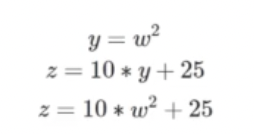


In [ ]:
w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 10*y + 50
z.backward()
w.grad

tensor(40.)

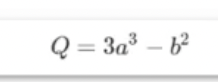

- 편미분

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

a.grad

tensor([36., 81.])

In [ ]:
b.grad

tensor([-12.,  -8.])